### Before UnderSampling


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the combined dataset
DATA_PATH = "../rawdata/combine_news.csv"

In [7]:
# Load dataset
df = pd.read_csv(DATA_PATH)
print("✅ Loaded dataset:", DATA_PATH)
print("📊 Total rows:", len(df))
df.head()

✅ Loaded dataset: ../rawdata/combine_news.csv
📊 Total rows: 31839


,Title,Text,Author,Url,Date,label,source
0,[DISINFORMASI] “Rakyat miskin nekat jual emas ...,“#SEBARKAN Rakyat miskin nekat jual emas reka...,Bentang Febrylian,https://turnbackhoax.id/2016/12/29/disinformas...,NaN,1,hoax
1,Danantara Resmi Jadi Mitra Kerja Komisi VI dan...,Badan Pengelola Investasi (BPI) Daya Anagata N...,Penulis tidak ditemukan,https://www.cnnindonesia.com/ekonomi/202507011...,2025/07/01 18:38:26,0,valid
2,[SALAH] Pesan Panggilan Seleksi Karyawan PT Wa...,PT WASKITA KARYA (Persero) Tbk mengundang unt...,Pemeriksa Fakta Junior,https://turnbackhoax.id/2020/12/01/salah-pesan...,NaN,1,hoax
3,Momen Anggota PKS Adu Mulut dengan Dasco Bahas...,"TEMPO.CO, Jakarta - Rancangan Kitab Undang-Und...",Reporter Ima Dini Shafira Editor Amirullah,https://nasional.tempo.co/read/1665047/momen-a...,NaN,0,valid
4,JK Bilang Pembentukan Provinsi Baru di Papua u...,"TEMPO.CO, Jakarta - Wakil Presiden Ke-10 dan K...",Reporter Editor Amirullah,https://nasional.tempo.co/read/1606835/jk-bila...,NaN,0,valid


In [8]:
# Check missing values per column
print("🔍 Missing values per column:")
df.isnull().sum()

🔍 Missing values per column:


Title         1
Text          0
Author      310
Url           0
Date      27442
label         0
source        0
dtype: int64

📊 Class distribution:
label
0    23326
1     8513
Name: count, dtype: int64


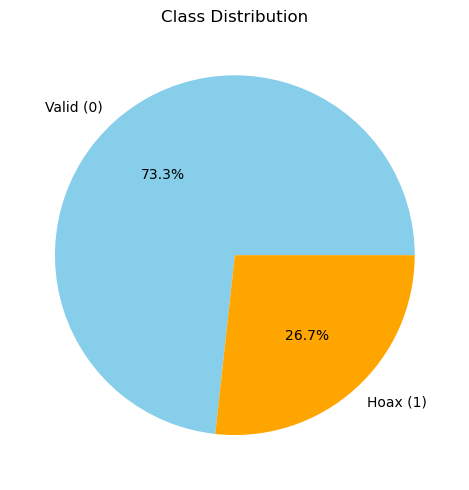

In [9]:
# Class distribution
print("📊 Class distribution:")
print(df["label"].value_counts())

# Pie chart
plt.figure(figsize=(5, 5))
df["label"].value_counts().plot.pie(
    labels=["Valid (0)", "Hoax (1)"],
    autopct="%.1f%%",
    colors=["skyblue", "orange"]
)
plt.title("Class Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [10]:
# Check for duplicate text
num_duplicates = df.duplicated(subset=["Text"]).sum()
print(f"📌 Duplicate entries based on `Text`: {num_duplicates}")

📌 Duplicate entries based on `Text`: 0


In [11]:
# Add character count column
df["text_length"] = df["Text"].astype(str).apply(len)

# Aggregate stats per class
length_stats = df.groupby("label")["text_length"].agg(["mean", "median", "min", "max"])
length_stats.rename(index={0: "Valid", 1: "Hoax"})


,mean,median,min,max
label,,,,
Valid,2509.610863,2324.0,117,24617
Hoax,1151.734641,486.0,6,32680


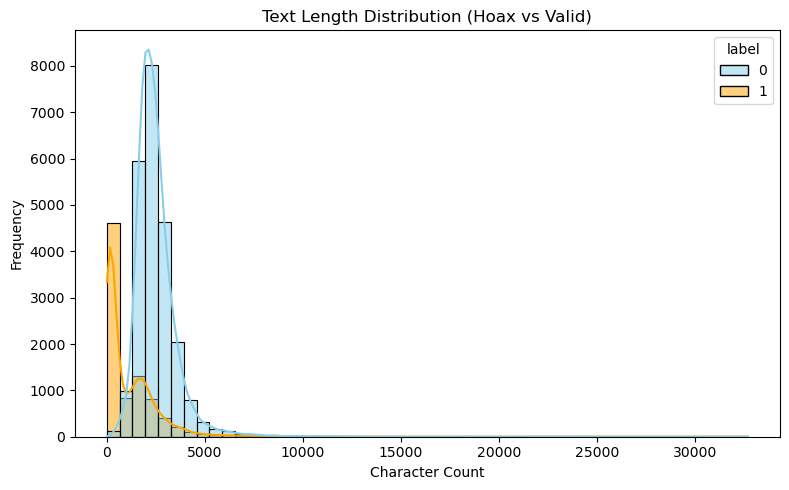

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="text_length", hue="label", bins=50, kde=True, palette={0: "skyblue", 1: "orange"})
plt.title("Text Length Distribution (Hoax vs Valid)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [13]:
# See most frequent titles
print("📰 Most common titles:")
df["Title"].value_counts().head(10)

📰 Most common titles:


Title
[SALAH] Gula Jawa Mengandung Formalin                                                                3
[SALAH] Istana Meresmikan Bahwa PKI Diperbolehkan di Indonesia                                       3
[SALAH] 6 Ormas Ini Resmi Dibubarkan Pemerintah                                                      3
[SALAH] Perubahan Tarif Transaksi BRI                                                                3
[SALAH] Perusahaan COVID Dibangun di Indonesia                                                       2
[SALAH] China Sudah Menjajah NKRI Salah Satunya Komplek Khusus Rumah Elit China Bertuliskan China    2
[SALAH] Tunggakan BPJS Kesehatan Lunas Hanya Dengan Bayar 6 Bulan                                    2
[SALAH]: Link Untuk Mengecek Daftar KK Penerima Bansos Rp300 Ribu DKI Jakarta Per Januari 2021       2
[SALAH] “ANANG NEKAT CERAIKAN AHSYANTY DEMI MEMBELA KD”                                              2
[SALAH] Tidak Boleh Keluar Rumah Pada Tanggal 21 Desember 2022     

In [14]:
import pandas as pd
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stopwords = set(StopWordRemoverFactory().get_stop_words())


In [15]:
df = pd.read_csv(DATA_PATH)
df = df[["Text", "label"]].dropna()
df["text"] = df["Text"].astype(str)
print(f"✅ Loaded {len(df)} rows") 

✅ Loaded 31839 rows


In [16]:
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stopwords and w.isalpha()]
    return words

df["tokens"] = df["text"].apply(preprocess)

In [17]:
def get_top_words(df, label, n=20):
    all_words = [word for tokens in df[df["label"] == label]["tokens"] for word in tokens]
    counter = Counter(all_words)
    return counter.most_common(n)

top_hoax = get_top_words(df, 1)
top_valid = get_top_words(df, 0)

# Convert to DataFrame
df_hoax = pd.DataFrame(top_hoax, columns=["word", "count"])
df_valid = pd.DataFrame(top_valid, columns=["word", "count"])


C:\Users\rzain\AppData\Local\Temp\ipykernel_10764\2555036461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=df_hoax, palette="Oranges_r")


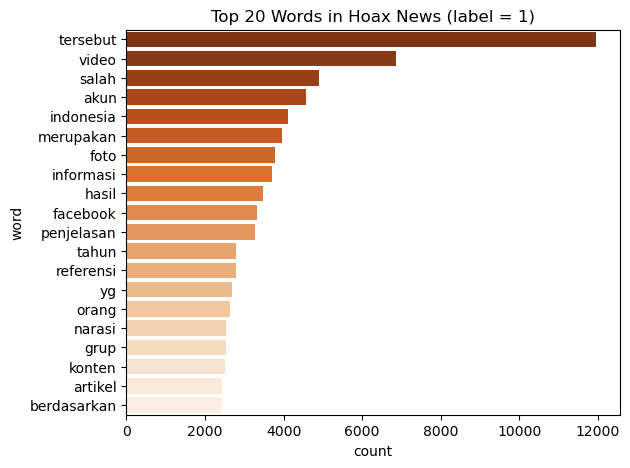

In [18]:
plt.figure(figsize=(14, 5))

# Hoax
plt.subplot(1, 2, 1)
sns.barplot(x="count", y="word", data=df_hoax, palette="Oranges_r")
plt.title("Top 20 Words in Hoax News (label = 1)")

# plt.tight_layout()
plt.show()


C:\Users\rzain\AppData\Local\Temp\ipykernel_10764\3628692060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=df_valid, palette="Blues_r")


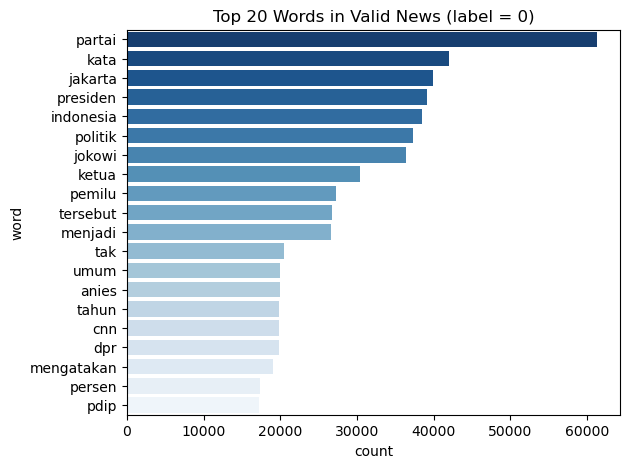

In [19]:
plt.figure(figsize=(14, 5))

# Valid
plt.subplot(1, 2, 1)
sns.barplot(x="count", y="word", data=df_valid, palette="Blues_r")
plt.title("Top 20 Words in Valid News (label = 0)")

plt.show()

### After UnderSampling

In [20]:
DATA_PATH = "../rawdata/combine_news_balanced.csv"

# Load dataset
df = pd.read_csv(DATA_PATH)
print("✅ Loaded dataset:", DATA_PATH)
print("📊 Total rows:", len(df))
df.head()

✅ Loaded dataset: ../rawdata/combine_news_balanced.csv
📊 Total rows: 17026


,Title,Text,Author,Url,Date,label,source
0,Jokowi Pilih Zulkifli Hasan Jadi Mendag: Butuh...,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",Reporter Fajar Pebrianto Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1602180/jokowi-...,NaN,0,valid
1,"NasDem Usulkan Deklarasi Koalisi 10 November, ...","TEMPO.CO, Jakarta - Partai NasDem, Partai Demo...",Reporter Ima Dini Shafira Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1651225/nasdem-...,NaN,0,valid
2,[SALAH] “Semua Fraksi Sepakat Copot Anies”,Video berdurasi 11 menit 40 detik dengan judu...,Pemeriksa Fakta Junior,https://turnbackhoax.id/2021/02/05/salah-semua...,NaN,1,hoax
3,Mahfud Bantah UU Cipta Kerja Tak Berlaku: Itu ...,"Jakarta, CNN Indonesia -- Menteri Koordinator ...",CNN Indonesia,https://www.cnnindonesia.com/nasional/20211202...,NaN,0,valid
4,Gibran soal Usulan Gubernur Ditunjuk Presiden:...,"Solo, CNN Indonesia -- Wali Kota Solo Gibran R...",CNN Indonesia,https://www.cnnindonesia.com/nasional/20230206...,NaN,0,valid


In [21]:
# Check missing values per column
print("🔍 Missing values per column:")
df.isnull().sum()

🔍 Missing values per column:


Title         1
Text          0
Author      120
Url           0
Date      14169
label         0
source        0
dtype: int64

📊 Class distribution:
label
0    8513
1    8513
Name: count, dtype: int64


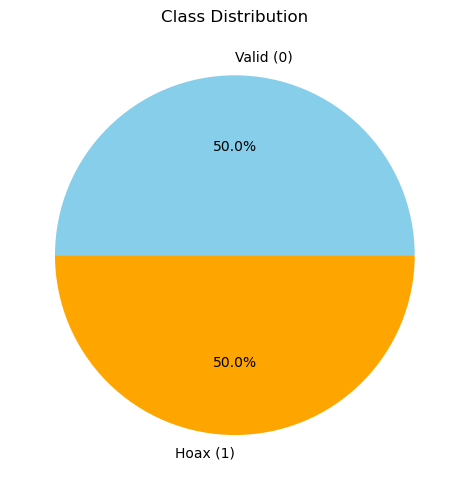

In [22]:
# Class distribution
print("📊 Class distribution:")
print(df["label"].value_counts())

# Pie chart
plt.figure(figsize=(5, 5))
df["label"].value_counts().plot.pie(
    labels=["Valid (0)", "Hoax (1)"],
    autopct="%.1f%%",
    colors=["skyblue", "orange"]
)
plt.title("Class Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [23]:
# Check for duplicate text
num_duplicates = df.duplicated(subset=["Text"]).sum()
print(f"📌 Duplicate entries based on `Text`: {num_duplicates}")

📌 Duplicate entries based on `Text`: 0


In [24]:
# Add character count column
df["text_length"] = df["Text"].astype(str).apply(len)

# Aggregate stats per class
length_stats = df.groupby("label")["text_length"].agg(["mean", "median", "min", "max"])
length_stats.rename(index={0: "Valid", 1: "Hoax"})


,mean,median,min,max
label,,,,
Valid,2507.183014,2325.0,148,13012
Hoax,1151.734641,486.0,6,32680


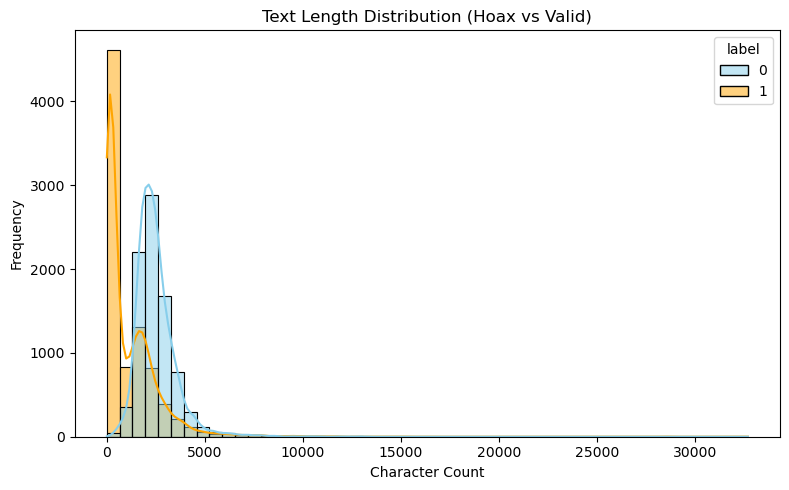

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="text_length", hue="label", bins=50, kde=True, palette={0: "skyblue", 1: "orange"})
plt.title("Text Length Distribution (Hoax vs Valid)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [26]:
# See most frequent titles
print("📰 Most common titles:")
df["Title"].value_counts().head(10)

📰 Most common titles:


Title
[SALAH] Gula Jawa Mengandung Formalin                                                 3
[SALAH] 6 Ormas Ini Resmi Dibubarkan Pemerintah                                       3
[SALAH] Istana Meresmikan Bahwa PKI Diperbolehkan di Indonesia                        3
[SALAH] Perubahan Tarif Transaksi BRI                                                 3
[SALAH] Bendera Merah Putih Dilarang Berkibar di PIK                                  2
[SALAH] PT Indocement Tigaroda Bagikan Hadiah Pembangunan Rumah                       2
[SALAH] GURITA BISA HIDUP DI DARAT                                                    2
[SALAH] Akun WhatsApp Wakil Bupati Kebumen Ristawati Purwaningsih “+6281231623266”    2
[SALAH] China dan Iran Dukung Indonesia Menghadapi Australia                          2
[SALAH] ATRIBUT DAN BALIHO ANIES DIBAKAR                                              2
Name: count, dtype: int64

In [27]:
import pandas as pd
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stopwords = set(StopWordRemoverFactory().get_stop_words())


In [28]:
df = pd.read_csv(DATA_PATH)
df = df[["Text", "label"]].dropna()
df["text"] = df["Text"].astype(str)
print(f"✅ Loaded {len(df)} rows") 

✅ Loaded 17026 rows


In [29]:
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stopwords and w.isalpha()]
    return words

df["tokens"] = df["text"].apply(preprocess)

In [30]:
def get_top_words(df, label, n=20):
    all_words = [word for tokens in df[df["label"] == label]["tokens"] for word in tokens]
    counter = Counter(all_words)
    return counter.most_common(n)

top_hoax = get_top_words(df, 1)
top_valid = get_top_words(df, 0)

# Convert to DataFrame
df_hoax = pd.DataFrame(top_hoax, columns=["word", "count"])
df_valid = pd.DataFrame(top_valid, columns=["word", "count"])


C:\Users\rzain\AppData\Local\Temp\ipykernel_10764\3447658315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=df_hoax, palette="Oranges_r")


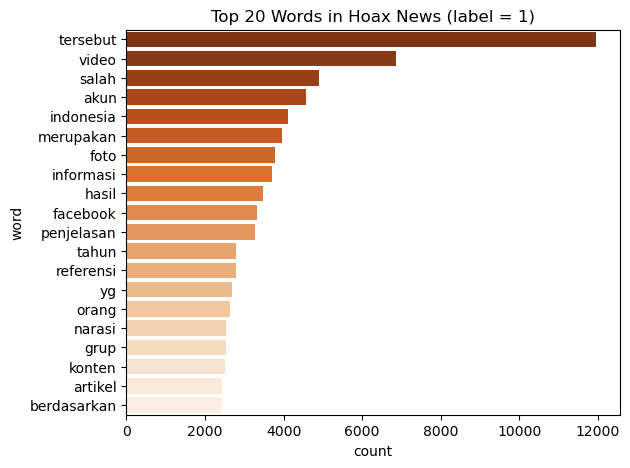

In [31]:
plt.figure(figsize=(14, 5))

# Hoax
plt.subplot(1, 2, 1)
sns.barplot(x="count", y="word", data=df_hoax, palette="Oranges_r")
plt.title("Top 20 Words in Hoax News (label = 1)")

# plt.tight_layout()
plt.show()

C:\Users\rzain\AppData\Local\Temp\ipykernel_10764\3628692060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=df_valid, palette="Blues_r")


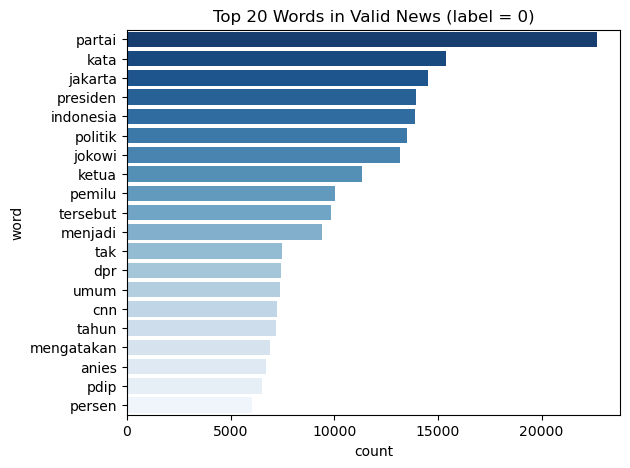

In [32]:
plt.figure(figsize=(14, 5))

# Valid
plt.subplot(1, 2, 1)
sns.barplot(x="count", y="word", data=df_valid, palette="Blues_r")
plt.title("Top 20 Words in Valid News (label = 0)")

plt.show()

### After PreProcessing

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "../rawdata/combine_news_final.csv"

# Load dataset
df = pd.read_csv(DATA_PATH)
print("✅ Loaded dataset:", DATA_PATH)
print("📊 Total rows:", len(df))
df.head()

✅ Loaded dataset: ../rawdata/combine_news_final.csv
📊 Total rows: 16997


,Title,Text,Author,Url,Date,label,source
0,Jokowi Pilih Zulkifli Hasan Jadi Mendag: Butuh...,", Jakarta - Presiden Joko Widodo atau Jokowi m...",Reporter Fajar Pebrianto Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1602180/jokowi-...,NaN,0,valid
1,"NasDem Usulkan Deklarasi Koalisi 10 November, ...",", Jakarta - Partai NasDem, Partai Demokrat, da...",Reporter Ima Dini Shafira Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1651225/nasdem-...,NaN,0,valid
2,[SALAH] “Semua Fraksi Sepakat Copot Anies”,Video berdurasi 11 menit 40 detik dengan judul...,Pemeriksa Fakta Junior,https://turnbackhoax.id/2021/02/05/salah-semua...,NaN,1,hoax
3,Mahfud Bantah UU Cipta Kerja Tak Berlaku: Itu ...,"Jakarta, -- Menteri Koordinator Bidang Politik...",CNN Indonesia,https://www.cnnindonesia.com/nasional/20211202...,NaN,0,valid
4,Gibran soal Usulan Gubernur Ditunjuk Presiden:...,"Solo, -- Wali Kota Solo Gibran Rakabuming Raka...",CNN Indonesia,https://www.cnnindonesia.com/nasional/20230206...,NaN,0,valid


In [34]:
# Check missing values per column
print("🔍 Missing values per column:")
df.isnull().sum()

🔍 Missing values per column:


Title         1
Text          0
Author      120
Url           0
Date      14141
label         0
source        0
dtype: int64

📊 Class distribution:
label
0    8513
1    8484
Name: count, dtype: int64


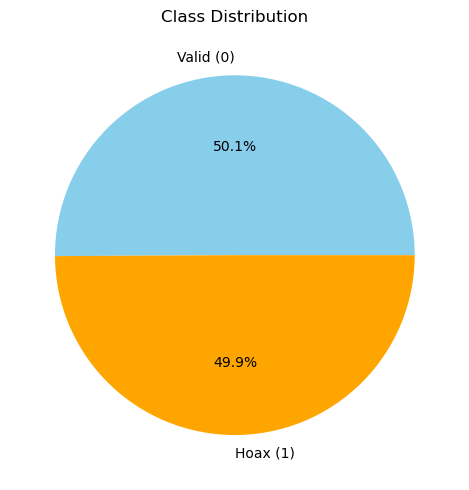

In [35]:
# Class distribution
print("📊 Class distribution:")
print(df["label"].value_counts())

# Pie chart
plt.figure(figsize=(5, 5))
df["label"].value_counts().plot.pie(
    labels=["Valid (0)", "Hoax (1)"],
    autopct="%.1f%%",
    colors=["skyblue", "orange"]
)
plt.title("Class Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [36]:
# Check for duplicate text
num_duplicates = df.duplicated(subset=["Text"]).sum()
print(f"📌 Duplicate entries based on `Text`: {num_duplicates}")

📌 Duplicate entries based on `Text`: 4


In [37]:
# Add character count column
df["text_length"] = df["Text"].astype(str).apply(len)

# Aggregate stats per class
length_stats = df.groupby("label")["text_length"].agg(["mean", "median", "min", "max"])
length_stats.rename(index={0: "Valid", 1: "Hoax"})


,mean,median,min,max
label,,,,
Valid,2437.672971,2251.0,148,12972
Hoax,1039.975955,474.0,20,29412


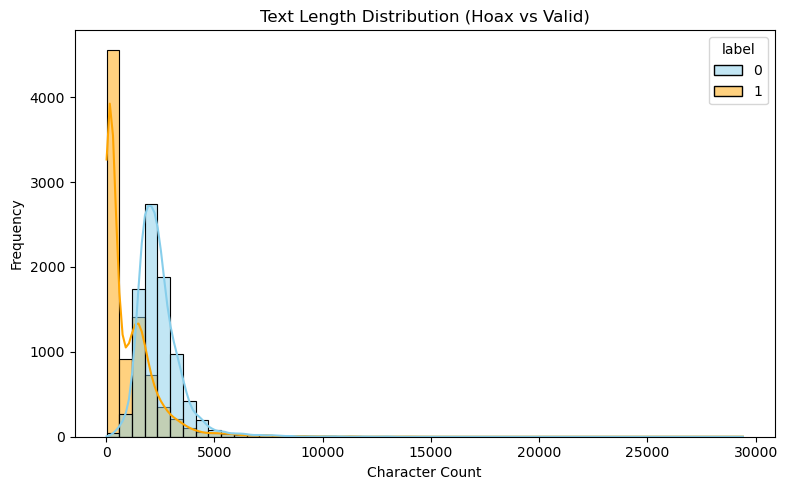

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="text_length", hue="label", bins=50, kde=True, palette={0: "skyblue", 1: "orange"})
plt.title("Text Length Distribution (Hoax vs Valid)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

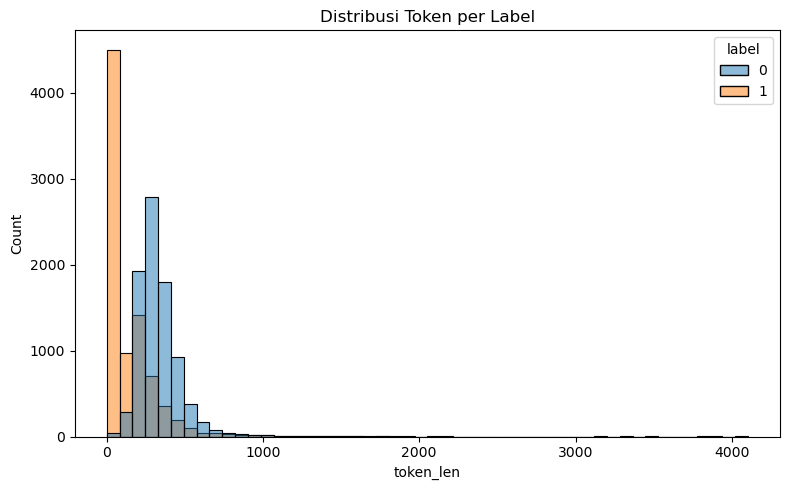

In [51]:
df["char_len"] = df["Text"].astype(str).str.len()
df["token_len"] = df["Text"].astype(str).str.split().apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="token_len", hue="label", bins=50)
plt.title("Distribusi Token per Label")
plt.tight_layout()
plt.show()

In [39]:
# See most frequent titles
print("📰 Most common titles:")
df["Title"].value_counts().head(10)

📰 Most common titles:


Title
[SALAH] Gula Jawa Mengandung Formalin                                                                           3
[SALAH] Perubahan Tarif Transaksi BRI                                                                           3
[SALAH] 6 Ormas Ini Resmi Dibubarkan Pemerintah                                                                 3
[SALAH] Istana Meresmikan Bahwa PKI Diperbolehkan di Indonesia                                                  3
[SALAH] Kilang Pertamina Meledak Suplai Bahan Bakar Mengalami Kelangkaan                                        2
[SALAH] 1387 Warga Indonesia Tewas Akibat Guncangan Gempa di 4 Wilayah                                          2
[SALAH] Artikel Merdeka.com Berjudul Ibadah Haji Dibatalkan dan Seluruh Dana Dialihkan untuk Pembangunan IKN    2
[SALAH] MK Legalkan Zina dan LGBT                                                                               2
[SALAH] Gunung Semeru Terbelah Menjadi Dua                                        

In [40]:
import pandas as pd
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stopwords = set(StopWordRemoverFactory().get_stop_words())


In [41]:
df = pd.read_csv(DATA_PATH)
df = df[["Text", "label"]].dropna()
df["text"] = df["Text"].astype(str)
print(f"✅ Loaded {len(df)} rows") 

✅ Loaded 16997 rows


In [42]:
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stopwords and w.isalpha()]
    return words

df["tokens"] = df["text"].apply(preprocess)

In [43]:
def get_top_words(df, label, n=20):
    all_words = [word for tokens in df[df["label"] == label]["tokens"] for word in tokens]
    counter = Counter(all_words)
    return counter.most_common(n)

top_hoax = get_top_words(df, 1)
top_valid = get_top_words(df, 0)

# Convert to DataFrame
df_hoax = pd.DataFrame(top_hoax, columns=["word", "count"])
df_valid = pd.DataFrame(top_valid, columns=["word", "count"])


C:\Users\rzain\AppData\Local\Temp\ipykernel_10764\3447658315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=df_hoax, palette="Oranges_r")


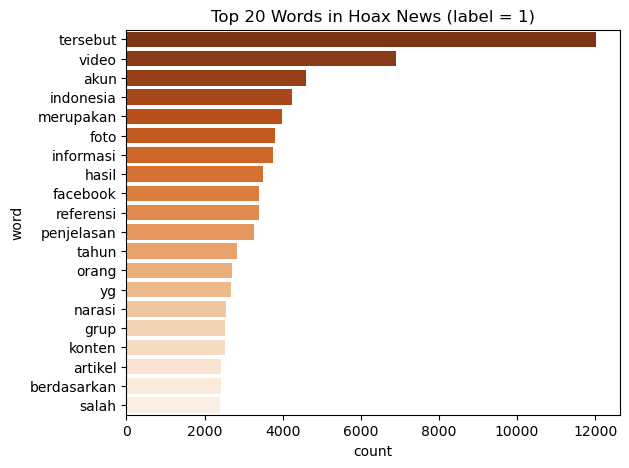

In [44]:
plt.figure(figsize=(14, 5))

# Hoax
plt.subplot(1, 2, 1)
sns.barplot(x="count", y="word", data=df_hoax, palette="Oranges_r")
plt.title("Top 20 Words in Hoax News (label = 1)")

# plt.tight_layout()
plt.show()

C:\Users\rzain\AppData\Local\Temp\ipykernel_10764\3628692060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=df_valid, palette="Blues_r")


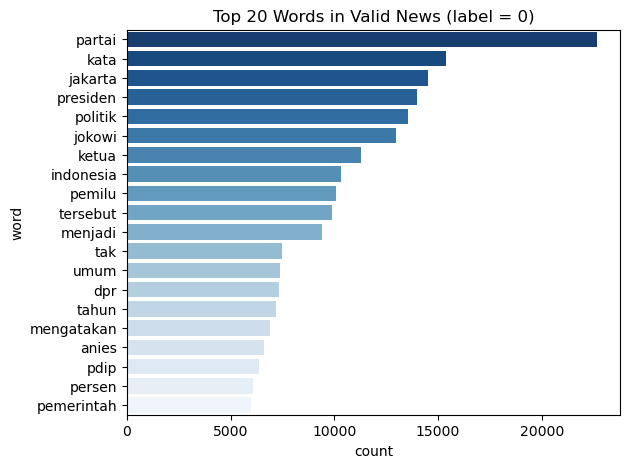

In [45]:
plt.figure(figsize=(14, 5))

# Valid
plt.subplot(1, 2, 1)
sns.barplot(x="count", y="word", data=df_valid, palette="Blues_r")
plt.title("Top 20 Words in Valid News (label = 0)")

plt.show()

In [46]:
# Check sample of cleaned texts
import random

sample = df.sample(5, random_state=42)
for i, row in sample.iterrows():
    print(f"\n🔹 Label: {row['label']}")
    print(row['Text'][:500], "...\n")


🔹 Label: 0
, Jakarta - Ketua Umum DPP PDI Perjuangan (PDIP) Megawati Soekarnoputri meminta setiap kader partai harus turun ke bawah membangun kepekaan terhadap persoalan rakyat. Hal itu disampaikan Megawati saat membuka Pelatihan Kader Nasional PDIP Angkatan II 2022 secara virtual, Senin, 21 Maret 2022.Megawati mengingatkan seluruh kader termasuk yang berhasil lolos ke legislatif dan eksekutif, harus terus bergerak bersama rakyat, menyelesaikan persoalan rakyat dan melakukan pergerakan membangun masa depan ...


🔹 Label: 1
"PPKM DARURAT Pemerintah Kabupaten Sukabumi Memberlakukan PERBANYAK PERGI KE MESJID dari tanggal 3 Juli 2021 – 20 Juli 2021″ ...


🔹 Label: 1
Portal media asal australia, news.com.au memberitakan tentang penolakan Mantan Miss Universe asal Australia, Tegan Martin oleh Indonesia karena ada noda di paspornya dengan judul "Former Miss Universe Australia stranded in Bali because of damp passport." ===== Penjelasan Lengkap: Portal media news.com.au memberitakan Mantan Mi

In [9]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/216.1 MB 13.1 MB/s eta 0:00:17
    --------------------------------------- 4.7/216.1 MB 11.9 MB/s eta 0:00:18
   - -------------------------------------- 7.1/216.1 MB 11.8 MB/s eta 0:00:18
   - -------------------------------------- 9.4/216.1 MB 11.7 MB/s eta 0:00:18
   -- ------------------------------------- 11.8/216.1 MB 11.7 MB/s eta 0:00:18
   -- ------------------------------------- 14.4/216.1 MB 11.8 MB/s eta 0:00:18
   --- ------------------------------------ 16.8/216.1 MB 11.7 MB/s eta 0:00:17
   --- ------------------------------------ 19.1/216.1 MB 11.7 MB/s eta 0:00:17
   --- ------------------------------------ 21.5/216.1 MB 11.7 MB/s eta 0:00:17
   ---- ----------------------------------- 23.9/216.1 MB 11.7 MB/s eta 0:00:17
   ---- ----------------------------------- 26.5/216.1 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import pandas as pd
import torch

In [4]:
df_clean = pd.read_csv("../cleandata/train_dataset_cleaned.csv")
df_clean.head()

,Text,label
0,", jakarta - presiden joko widodo atau jokowi m...",0
1,", jakarta - partai nasdem, partai demokrat, da...",0
2,video berdurasi 11 menit 40 detik dengan judul...,1
3,"jakarta, - - menteri koordinator bidang politi...",0
4,"solo, - - wali kota solo gibran rakabuming rak...",0


In [12]:
print("Total samples:", len(df_clean))
print("Label distribution:\n", df_clean['label'].value_counts())

Total samples: 16606
Label distribution:
 label
0    8513
1    8093
Name: count, dtype: int64


In [9]:
df_clean['text_length'] = df_clean['Text'].apply(len)
df_clean['text_length'].describe()

count    16606.000000
mean      1567.376370
std        923.321707
min          9.000000
25%        589.250000
50%       1763.000000
75%       2409.000000
max       3282.000000
Name: text_length, dtype: float64

In [14]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

df_clean['token_count'] = df_clean['Text'].apply(lambda x: len(tokenizer.tokenize(str(x))))
df_clean['token_count'].describe()


count    16606.000000
mean       294.155185
std        167.069688
min          8.000000
25%        120.000000
50%        331.000000
75%        463.000000
max        480.000000
Name: token_count, dtype: float64

In [16]:
print("🟥 Hoax Sample:\n", df_clean[df_clean['label'] == 1]['Text'].iloc[0])
print("\n🟩 Valid Sample:\n", df_clean[df_clean['label'] == 0]['Text'].iloc[0])

🟥 Hoax Sample:
 video berdurasi 11 menit 40 detik dengan judul " semua fraksi sepakat copot anies, jokowi beri restu!? ~ berita terbaru ". thumbnail dalam video akhirnya gerindra balik arah semua fraksi sepakat copot anies = = = =

🟩 Valid Sample:
 , jakarta - presiden joko widodo atau jokowi membeberkan alasannya menunjuk ketua umum partai amanat nasional ( pan ) zulkifli hasan sebagai menteri perdagangan menggantikan muhammad luthfi. jokowi menilai zulkifli punya pengalaman dan rekam jejak yang panjang, sehingga cocok di posisi tersebut. " karena sekarang ini urusan pangan yang berkaitan dengan rakyat ini memerlukan pengalaman lapangan, " kata jokowi usai acara pelantikan, rabu, 15 juni 2022. jokowi senang plta mentarang induk digarap ri - malaysia : saudara serumpun bisa kerja sama dengan baik urusan pangan yang berkaitan dengan rakyat ini, kata jokowi, memerlukan kerja - kerja yang terjun lapangan untuk melihat langsung persoalan. " utamanya berkaitan dengan kebutuhan pokok rakyat,

📈 Token count statistics:
count    16606.000000
mean       294.155185
std        167.069688
min          8.000000
25%        120.000000
50%        331.000000
75%        463.000000
max        480.000000
Name: token_count, dtype: float64


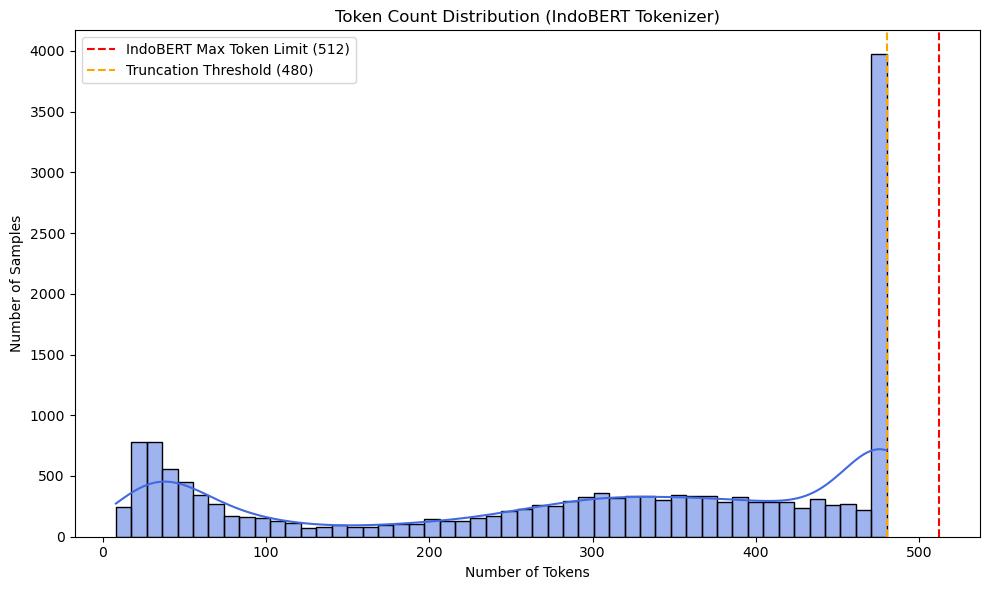

⚠️ Samples exceeding 512 tokens: 0
⚠️ Samples exceeding 480 tokens: 0


In [5]:
# 📊 Token Count Distribution

from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

# Tokenize and count tokens
df_clean['token_count'] = df_clean['Text'].apply(lambda x: len(tokenizer.tokenize(str(x))))

# Describe statistics
print("📈 Token count statistics:")
print(df_clean['token_count'].describe())

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['token_count'], bins=50, kde=True, color='royalblue')
plt.axvline(512, color='red', linestyle='--', label='IndoBERT Max Token Limit (512)')
plt.axvline(480, color='orange', linestyle='--', label='Truncation Threshold (480)')
plt.title("Token Count Distribution (IndoBERT Tokenizer)")
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Samples")
plt.legend()
plt.tight_layout()
plt.show()

# Optional: check how many are still above threshold
print("⚠️ Samples exceeding 512 tokens:", (df_clean['token_count'] > 512).sum())
print("⚠️ Samples exceeding 480 tokens:", (df_clean['token_count'] > 480).sum())


Total samples: 16606
Samples exceeding 480 tokens: 3766 (22.68%)
Average tokens lost: 1.99
Max tokens lost: 2
Examples of original token lengths (truncated): [482 482 482 482 482 482 482 482 482 482]


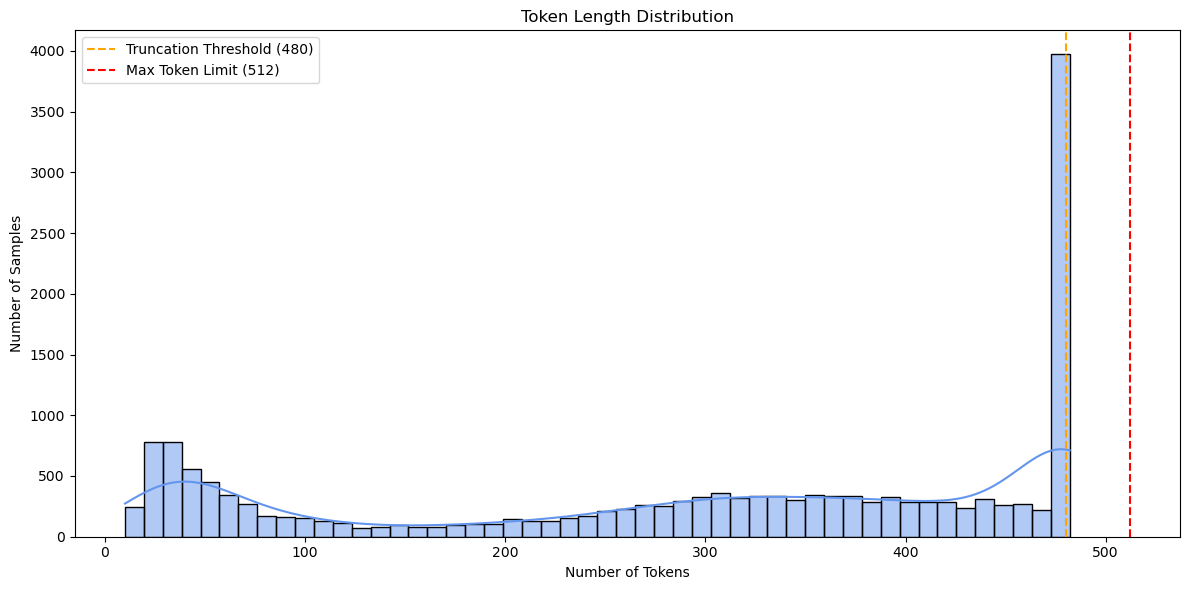

In [7]:
from transformers import AutoTokenizer
import pandas as pd
import numpy as np

# === CONFIG ===
MODEL_NAME = "indobenchmark/indobert-base-p1"
TRUNCATION_THRESHOLD = 480

# === LOAD YOUR TEXT DATA ===
# Replace this with your actual data source (CSV, JSON, list, etc.)
df = pd.read_csv("../cleandata/train_dataset_cleaned.csv")  # must contain a 'text' column
texts = df["Text"].tolist()

# === INITIALIZE TOKENIZER ===
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# === TOKENIZE AND COUNT ===
token_lengths = [len(tokenizer.encode(text, truncation=False)) for text in texts]

# === ANALYSIS ===
token_lengths = np.array(token_lengths)
total_samples = len(token_lengths)
truncated_samples = token_lengths[token_lengths > TRUNCATION_THRESHOLD]
num_truncated = len(truncated_samples)

# === REPORT ===
print(f"Total samples: {total_samples}")
print(f"Samples exceeding {TRUNCATION_THRESHOLD} tokens: {num_truncated} ({(num_truncated / total_samples) * 100:.2f}%)")
if num_truncated > 0:
    avg_tokens_lost = np.mean(truncated_samples - TRUNCATION_THRESHOLD)
    max_tokens_lost = np.max(truncated_samples - TRUNCATION_THRESHOLD)
    print(f"Average tokens lost: {avg_tokens_lost:.2f}")
    print(f"Max tokens lost: {max_tokens_lost}")
    print("Examples of original token lengths (truncated):", truncated_samples[:10])
else:
    print("No samples were truncated.")

# === OPTIONAL: Histogram Plot ===
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(token_lengths, bins=50, kde=True, color='cornflowerblue', edgecolor='black')
plt.axvline(TRUNCATION_THRESHOLD, color='orange', linestyle='--', label=f'Truncation Threshold ({TRUNCATION_THRESHOLD})')
plt.axvline(512, color='red', linestyle='--', label='Max Token Limit (512)')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Samples')
plt.title('Token Length Distribution')
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""

    text = text.strip()

    # --- HOAX TAGS ---
    hoax_patterns = [
        r"\[(SALAH|DISINFORMASI|NARASI|BENAR|PENIPUAN|HOAKS|HOAX)\]:?",
        r"\b(KLARIFIKASI|HOAKS|HOAX|DISINFORMASI|HASUT|HOAX\s*\+\s*HASUT|ISU|FITNAH|PENIPUAN|EDUKASI)\b",
        r"\((DISINFORMASI|MISINFORMASI|EDUKASI)\)"
    ]
    for pat in hoax_patterns:
        text = re.sub(pat, "", text, flags=re.IGNORECASE)

    # --- VALID LAYOUT ARTIFACTS ---
    valid_noise = [
        r"ADVERTISEMENT.*?CONTINUE WITH CONTENT",
        r"SCROLL TO RESUME CONTENT",
        r"Lihat Juga\s*:", r"Baca Juga\s*:",
        r"\[Gambas:.*?\]", r"\[VIDEO\]", r"\[FULL\]",
        r"\[POPULER NASIONAL\]", r"\[POPULER NUSANTARA\]", r"\[HOAKS\]",
        r"CNN Indonesia", r"TEMPO\.CO", r"KOMPAS\.com", r"\(fnr/bmw\)"
    ]
    for pat in valid_noise:
        text = re.sub(pat, "", text, flags=re.IGNORECASE)

    # --- Normalize punctuation and spacing ---
    text = text.replace("“", '"').replace("”", '"').replace("‘", "'").replace("’", "'")
    text = re.sub(r"\r|\n|\u2028|\u2029", " ", text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"\s+", " ", text).strip()

    return text

# --- Contoh-contoh ---
examples = [
    "Presiden ke-6 RI Susilo Bambang Yudhoyono (SBY) merilis lagu berjudul 'Save Our World'.",
    "[SALAH]: Vaksin COVID-19 mengandung chip 5G untuk kontrol populasi",
    "ADVERTISEMENT SCROLL TO CONTINUE WITH CONTENT Pemerintah mengeluarkan kebijakan baru.",
    "CNN Indonesia melaporkan bahwa kasus meningkat tajam.",
    "“Ayo gunakan masker!” kata juru bicara pemerintah."
]

# --- Tampilkan hasil sebelum dan sesudah ---
for i, text in enumerate(examples, 1):
    cleaned = clean_text(text)
    print(f"🟡 Contoh {i} - Sebelum:\n{text}")
    print(f"🟢 Contoh {i} - Sesudah:\n{cleaned}\n{'-'*60}")


🟡 Contoh 1 - Sebelum:
Presiden ke-6 RI Susilo Bambang Yudhoyono (SBY) merilis lagu berjudul 'Save Our World'.
🟢 Contoh 1 - Sesudah:
Presiden ke-6 RI Susilo Bambang Yudhoyono (SBY) merilis lagu berjudul 'Save Our World'.
------------------------------------------------------------
🟡 Contoh 2 - Sebelum:
[SALAH]: Vaksin COVID-19 mengandung chip 5G untuk kontrol populasi
🟢 Contoh 2 - Sesudah:
Vaksin COVID-19 mengandung chip 5G untuk kontrol populasi
------------------------------------------------------------
🟡 Contoh 3 - Sebelum:
ADVERTISEMENT SCROLL TO CONTINUE WITH CONTENT Pemerintah mengeluarkan kebijakan baru.
🟢 Contoh 3 - Sesudah:
Pemerintah mengeluarkan kebijakan baru.
------------------------------------------------------------
🟡 Contoh 4 - Sebelum:
CNN Indonesia melaporkan bahwa kasus meningkat tajam.
🟢 Contoh 4 - Sesudah:
melaporkan bahwa kasus meningkat tajam.
------------------------------------------------------------
🟡 Contoh 5 - Sebelum:
“Ayo gunakan masker!” kata juru bicar